In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("dataset/train.csv", usecols=["Age", "Fare", "Survived"])

In [4]:
df.sample(10)

,Survived,Age,Fare
748,0,19.0,53.1000
545,0,64.0,26.0000
668,0,43.0,8.0500
762,1,20.0,7.2292
262,0,52.0,79.6500
298,1,NaN,30.5000
702,0,18.0,14.4542
367,1,NaN,7.2292
683,0,14.0,46.9000
42,0,NaN,7.8958


In [5]:
df["Age"].fillna(df['Age'].mean(), inplace=True)

In [7]:
df.sample(10)

,Survived,Age,Fare
463,0,48.000000,13.0000
332,0,38.000000,153.4625
832,0,29.699118,7.2292
364,0,29.699118,15.5000
261,1,3.000000,31.3875
757,0,18.000000,11.5000
703,0,25.000000,7.7417
460,1,48.000000,26.5500
875,1,15.000000,7.2250
395,0,22.000000,7.7958


In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
X = df.drop("Survived", axis="columns")
y = df["Survived"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\Habib\AppData\Local\Temp\ipykernel_5944\2955672033.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Age"])


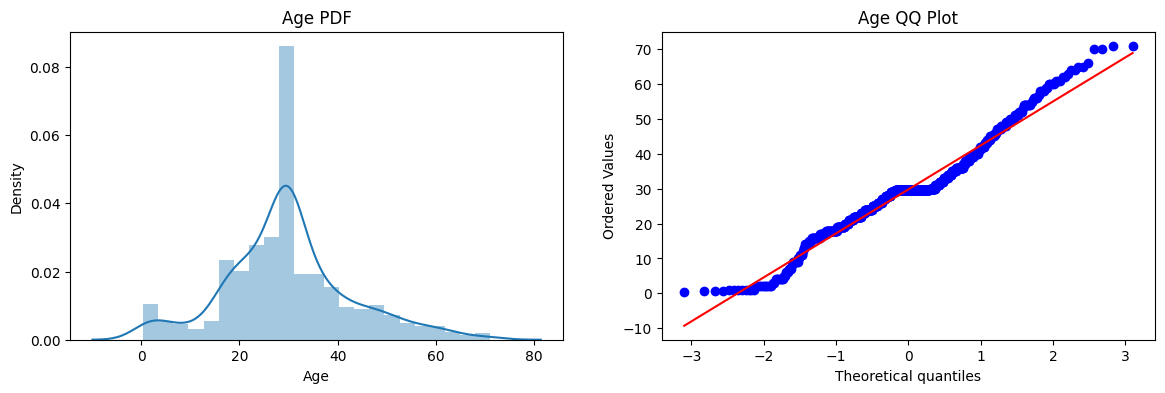

In [12]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.distplot(X_train["Age"])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train["Age"], dist="norm", plot=plt)
plt.title("Age QQ Plot")

plt.show()

C:\Users\Habib\AppData\Local\Temp\ipykernel_5944\1623903172.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Fare"])


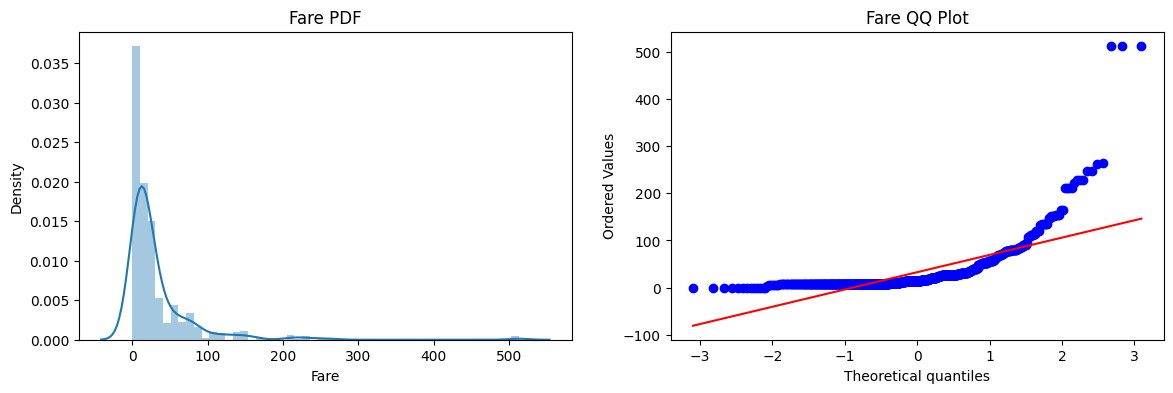

In [13]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.distplot(X_train["Fare"])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train["Fare"], dist="norm", plot=plt)
plt.title("Fare QQ Plot")

plt.show()

In [14]:
trf = FunctionTransformer(func=np.log1p)

In [15]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)